# Task 1 - Build a model that predicts whether a passenger on the Titanic survived or not

## Data Cleaning

### Loading the DataSet

In [73]:
import pandas as pd

In [74]:
titanic_passenger_data = pd.read_csv("Titanic-Dataset.csv")
titanic_passenger_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Analysing the data given 

In [75]:
#Checking for duplicate values
titanic_passenger_data.duplicated().sum()

0

In [76]:
#Checking for null values
titanic_passenger_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [77]:
#As the number of cabins has a lot of null values, Removing the cabin parameter
titanic_passenger_data.drop('Cabin', axis = 1, inplace = True)
titanic_passenger_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


#### Checking for irrelevent data with respect to the problem statement

1. SibSp, Parc, Ticket Parameters not required for finding the survived
2. Removing all the not required parameters

In [78]:
titanic_passenger_data.drop(['SibSp','Ticket','Parch'], axis = 1, inplace = True)

In [79]:
titanic_passenger_data

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S
...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,C


In [80]:
#Names is also not required, so removing Names parameter
titanic_passenger_data.drop('Name', axis = 1, inplace = True)
titanic_passenger_data

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,male,22.0,7.2500,S
1,2,1,1,female,38.0,71.2833,C
2,3,1,3,female,26.0,7.9250,S
3,4,1,1,female,35.0,53.1000,S
4,5,0,3,male,35.0,8.0500,S
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,13.0000,S
887,888,1,1,female,19.0,30.0000,S
888,889,0,3,female,NaN,23.4500,S
889,890,1,1,male,26.0,30.0000,C


In [81]:
#Removing PasssengerId
titanic_passenger_data.drop('PassengerId', axis = 1, inplace = True)
titanic_passenger_data

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S
...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S
887,1,1,female,19.0,30.0000,S
888,0,3,female,NaN,23.4500,S
889,1,1,male,26.0,30.0000,C


#### Removed all the Parameters that does not contribute for finding the Survival
#### Checking for the Null values again

In [82]:
titanic_passenger_data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64

##### Only Age and Embarked has Null values

In [83]:
#Checking weather is a row contains null value for both the parameters
titanic_passenger_data[(titanic_passenger_data['Age'].isna()) & (titanic_passenger_data['Embarked'].isna())]

,Survived,Pclass,Sex,Age,Fare,Embarked


##### As the No. of missing values in the Embarked is only 2, Removing the row 
##### The number of missing values in Age is 177 we can't remove the row the missing value is huge (Try to fill with a meaningfull value)

In [84]:
#Dropped the misssing values from Embarked
titanic_passenger_data.dropna(subset = "Embarked", inplace = True, ignore_index = True)
titanic_passenger_data

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S
...,...,...,...,...,...,...
884,0,2,male,27.0,13.0000,S
885,1,1,female,19.0,30.0000,S
886,0,3,female,NaN,23.4500,S
887,1,1,male,26.0,30.0000,C


In [85]:
#Taking the first 10 rows to check check weather I can find a pattern for predicting the age
titanic_passenger_data.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S
5,0,3,male,NaN,8.4583,Q
6,0,1,male,54.0,51.8625,S
7,0,3,male,2.0,21.0750,S
8,1,3,female,27.0,11.1333,S
9,1,2,female,14.0,30.0708,C


In [86]:
#Filling the missing values of the age with median values, as there is no pattern to find age
age_median = titanic_passenger_data['Age'].median()
titanic_passenger_data['Age'] = titanic_passenger_data['Age'].fillna(age_median)
titanic_passenger_data

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S
...,...,...,...,...,...,...
884,0,2,male,27.0,13.0000,S
885,1,1,female,19.0,30.0000,S
886,0,3,female,28.0,23.4500,S
887,1,1,male,26.0,30.0000,C


### Completed the Data Cleaning Process

## Data Visualization

In [87]:
import matplotlib.pyplot as plt

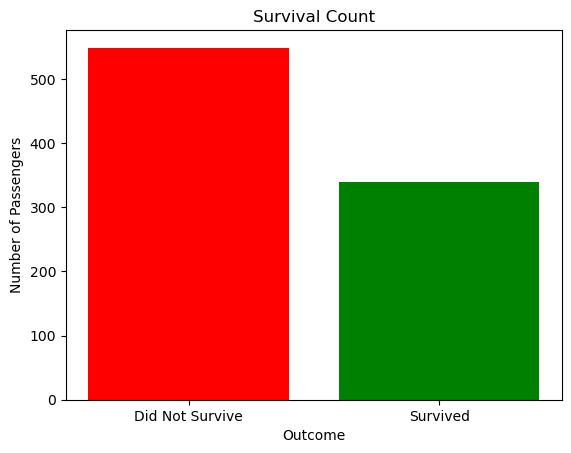

In [88]:
#Survived V/S Not Survived
survived_counts = titanic_passenger_data['Survived'].value_counts()
plt.bar(['Did Not Survive', 'Survived'], survived_counts, color=['red', 'green'])
plt.title('Survival Count')
plt.xlabel('Outcome')
plt.ylabel('Number of Passengers')
plt.show()

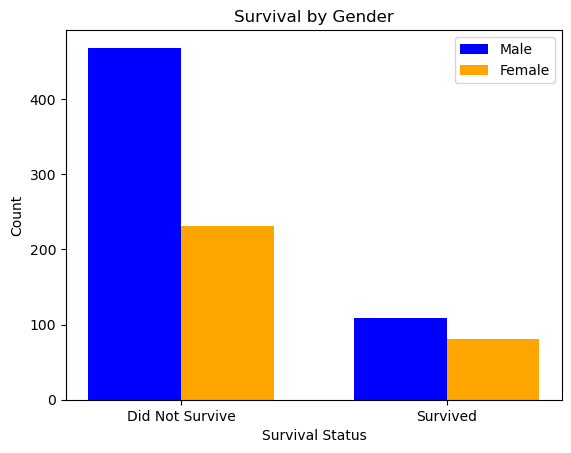

In [89]:
#Survival Based on Gender
male = titanic_passenger_data[titanic_passenger_data['Sex'] == 'male']['Survived'].value_counts()
female = titanic_passenger_data[titanic_passenger_data['Sex'] == 'female']['Survived'].value_counts()

bar_width = 0.35
index = [0, 1]

plt.bar(index, male, width=bar_width, label='Male', color='blue')
plt.bar([i + bar_width for i in index], female, width=bar_width, label='Female', color='orange')

plt.xticks([i + bar_width / 2 for i in index], ['Did Not Survive', 'Survived'])
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Survival by Gender')
plt.legend()
plt.show()



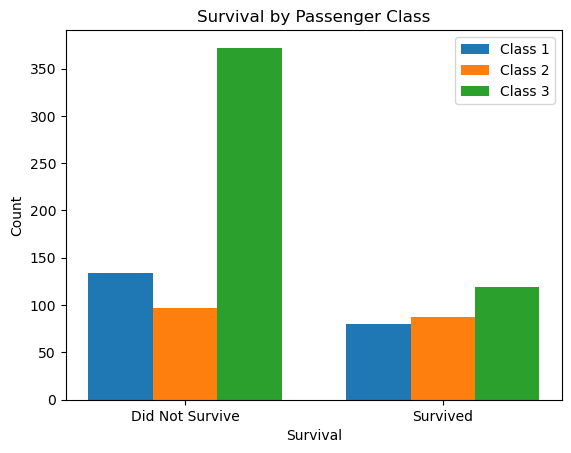

In [90]:
#Survival Based on Passenger Class
class_labels = [1, 2, 3]
for i, pclass in enumerate(class_labels):
    class_survival = titanic_passenger_data[titanic_passenger_data['Pclass'] == pclass]['Survived'].value_counts()
    plt.bar(
        [x + i*0.25 for x in [0, 1]],
        class_survival,
        width=0.25,
        label=f'Class {pclass}'
    )

plt.xticks([0.25, 1.25], ['Did Not Survive', 'Survived'])
plt.xlabel('Survival')
plt.ylabel('Count')
plt.title('Survival by Passenger Class')
plt.legend()
plt.show()


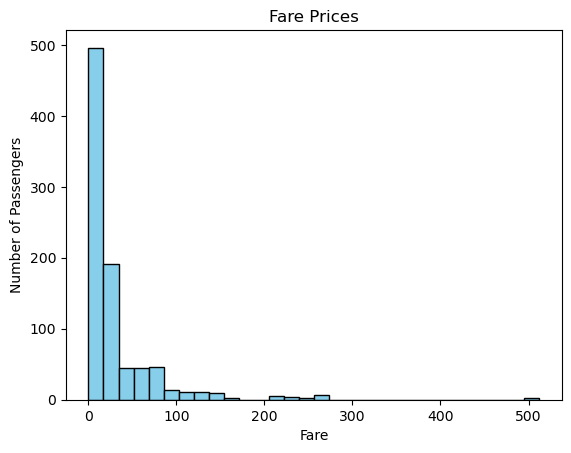

In [95]:
#Survival based on Fares
plt.hist(titanic_passenger_data['Fare'], bins=30, color='skyblue', edgecolor='black')
plt.title('Fare Prices')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.show()

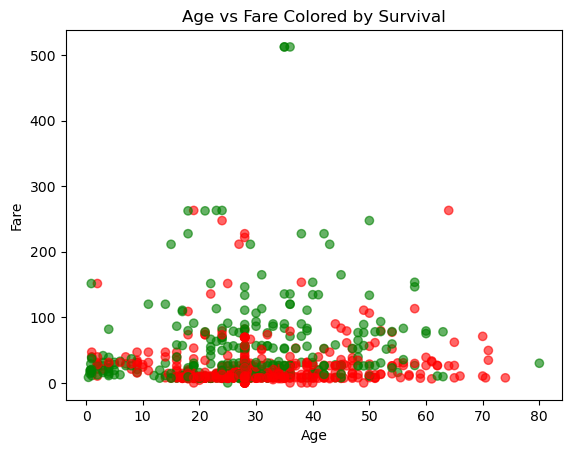

In [92]:
colors = titanic_passenger_data['Survived'].map({0: 'red', 1: 'green'})
plt.scatter(titanic_passenger_data['Age'], titanic_passenger_data['Fare'], c=colors, alpha=0.6)
plt.title('Age vs Fare Colored by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

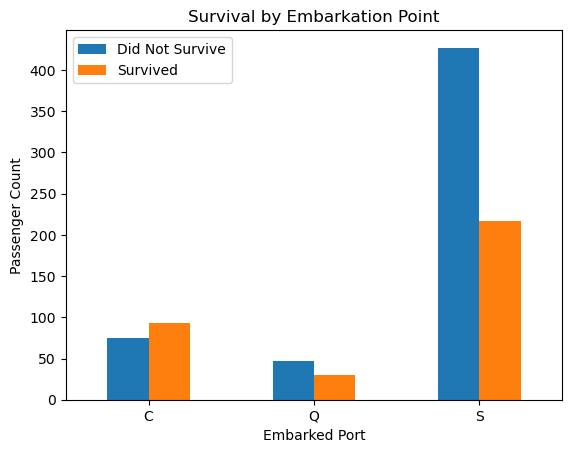

In [93]:
#Survivla based on Embarkation Points
embarked_survival = titanic_passenger_data.groupby(['Embarked', 'Survived']).size().unstack()
embarked_survival.plot(kind='bar', stacked=False)
plt.title('Survival by Embarkation Point')
plt.xlabel('Embarked Port')
plt.ylabel('Passenger Count')
plt.xticks(rotation=0)
plt.legend(['Did Not Survive', 'Survived'])
plt.show()

## Building a Model using Logistic Regression

1. Making the data suitable for the Model 
2. Spiting the data for training and testing
3. Training the model using suitable algorithm (Logistic Regression)
4. Evaluating the model
5. Make the model to predict

### Importing the suitable libraries 

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Making the data suitable for the Model

In [50]:
#Converting Gender into Binary terms [male:0 & female:1]
titanic_passenger_data['Sex'] = titanic_passenger_data['Sex'].str.strip().str.lower()
titanic_passenger_data['Sex'] = titanic_passenger_data['Sex'].map({'male':0,'female':1})
titanic_passenger_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,22.0,7.2500,S
1,1,1,1,38.0,71.2833,C
2,1,3,1,26.0,7.9250,S
3,1,1,1,35.0,53.1000,S
4,0,3,0,35.0,8.0500,S


In [51]:
#Creating dummies for the Embarked
titanic_passenger_data = pd.get_dummies(titanic_passenger_data, columns = ['Embarked'], drop_first = False)
titanic_passenger_data

,Survived,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,7.2500,False,False,True
1,1,1,1,38.0,71.2833,True,False,False
2,1,3,1,26.0,7.9250,False,False,True
3,1,1,1,35.0,53.1000,False,False,True
4,0,3,0,35.0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...
884,0,2,0,27.0,13.0000,False,False,True
885,1,1,1,19.0,30.0000,False,False,True
886,0,3,1,28.0,23.4500,False,False,True
887,1,1,0,26.0,30.0000,True,False,False


In [54]:
#Using StandardScalar() to make fare and age fall in a particular scale
scaler = StandardScaler()
numeric_features = ['Age', 'Fare'] 
titanic_passenger_data[numeric_features] = scaler.fit_transform(titanic_passenger_data[numeric_features])

In [56]:
titanic_passenger_data[numeric_features].head()

,Age,Fare
0,-0.563674,-0.500240
1,0.669217,0.788947
2,-0.255451,-0.486650
3,0.438050,0.422861
4,0.438050,-0.484133


### Spiting the data for training and testing

In [57]:
x = titanic_passenger_data.drop(['Survived'], axis = 1)
y = titanic_passenger_data['Survived']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 12)

### Training the model using Logistic Regression

In [62]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

### Evaluating the model

In [63]:
predict_survivors = model.predict(x_test)

print("Accuracy", accuracy_score(y_test, predict_survivors))
print(confusion_matrix(y_test, predict_survivors))
print(classification_report(y_test, predict_survivors)) 

Accuracy 0.8033707865168539
[[89 23]
 [12 54]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.84       112
           1       0.70      0.82      0.76        66

    accuracy                           0.80       178
   macro avg       0.79      0.81      0.80       178
weighted avg       0.81      0.80      0.81       178



### Making Predictions with the model

In [70]:
sample_passenger = pd.DataFrame([[3, 0, 0.5, -0.4, 0, 1, 0]], columns = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S'])
survival = model.predict(sample_passenger)
if survival == 0:
    print("Not Survived")
elif survival == 1:
    print("Survived")

Not Survived
